In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

%matplotlib inline

In [29]:
df = pd.read_csv("Ratings_data.csv",index_col = 0)

In [11]:
df.shape

(23044, 4)

In [12]:
df.head()

,Product type,Title,Review,Rating
0,Smart Phone,Simply excellent. Read complete review written...,Excellent mobile for daily use @7500/-. Don't ...,5 star
1,Smart Phone,Amezing One,"If I started to rating it's all features, it w...",5 star
2,Smart Phone,BUDGET WORTHY PHONE,Worst phone.. overall performance is just bakw...,5 star
3,Smart Phone,Nice mobile at best price,Cheap & Best phone in this range,5 star
4,Smart Phone,Value for Money. Well done Redmi.,1. Display is excellent. Colors and sharpness ...,5 star


In [13]:
df.isnull().sum()

Product type    0
Title           1
Review          1
Rating          0
dtype: int64

In [30]:
df[df.isna().any(axis=1)]

,Product type,Title,Review,Rating
13468,Printer,NaN,"Without software unable to print, need hotel a...",3 star
22469,Router,na,NaN,5 star


In [31]:
df = df.fillna("Empty")

In [32]:
df.isnull().sum()

Product type    0
Title           0
Review          0
Rating          0
dtype: int64

In [33]:
for i in range(len(df["Rating"])):
    df["Rating"][i] = int(df["Rating"][i].replace(" star",""))

In [18]:
df.head()

,Product type,Title,Review,Rating
0,Smart Phone,Simply excellent. Read complete review written...,Excellent mobile for daily use @7500/-. Don't ...,5
1,Smart Phone,Amezing One,"If I started to rating it's all features, it w...",5
2,Smart Phone,BUDGET WORTHY PHONE,Worst phone.. overall performance is just bakw...,5
3,Smart Phone,Nice mobile at best price,Cheap & Best phone in this range,5
4,Smart Phone,Value for Money. Well done Redmi.,1. Display is excellent. Colors and sharpness ...,5


In [36]:
import re
import nltk
import string
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [22]:
def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)

In [23]:
title_words = []
words_for_cloud = ''
for i in df["Title"]:
    
    p = i.translate(str.maketrans("","",string.punctuation))
    p = remove_emojis(p).strip()
    
    text = re.sub(r'\[[0-9]+\]',' ',p)
    text = re.sub(r'\s+',' ',text)
    
    text=text.lower()
    
    text = re.sub(r'\d',' ',text)
    text = re.sub(r'\s+',' ',text)
    
    title_words.append(word_tokenize(text))
    
for i in range(len(title_words)):
    title_words[i] = [word for word in title_words[i]
                     if word not in stopwords.words("english") if word not in string.punctuation]
    for j in range(len(title_words[i])):
        words_for_cloud += title_words[i][j] + ' '

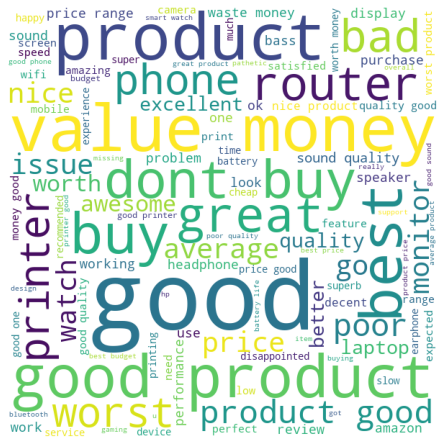

In [24]:
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                min_font_size = 10).generate(words_for_cloud) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

The words which are mostly occured in title summary are Product, best, good, buy, money, value, price, bad, worst, dont etc;

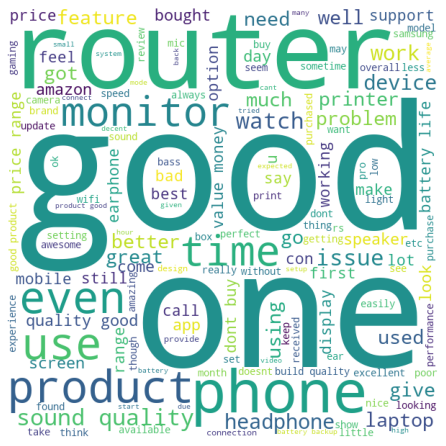

In [26]:
review_words = []
words_for_cloud1 = ''
for i in df["Review"]:
    
    p = i.translate(str.maketrans("","",string.punctuation))
    p = remove_emojis(p).strip()
    
    text = re.sub(r'\[[0-9]+\]',' ',p)
    text = re.sub(r'\s+',' ',text)
    
    text=text.lower()
    
    text = re.sub(r'\d',' ',text)
    text = re.sub(r'\s+',' ',text)
    
    review_words.append(word_tokenize(text))
    
for i in range(len(review_words)):
    review_words[i] = [word for word in review_words[i]
                     if word not in stopwords.words("english") if word not in string.punctuation]
    for j in range(len(review_words[i])):
        words_for_cloud1 += review_words[i][j] + ' '
        
        
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                min_font_size = 10).generate(words_for_cloud1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

the words good, one, even, quality, routor, phone, product, use, problem, monitor, time etc; are mostly used.

In [34]:
#lets combine the title and reviews column as title column is mostly the short summary of review.
for i in range(len(df["Review"])):
    df["Review"][i] = df["Title"][i]+ " "+ df["Review"][i]

In [35]:
df.head()

,Product type,Title,Review,Rating
0,Smart Phone,Simply excellent. Read complete review written...,Simply excellent. Read complete review written...,5
1,Smart Phone,Amezing One,Amezing One If I started to rating it's all fe...,5
2,Smart Phone,BUDGET WORTHY PHONE,BUDGET WORTHY PHONE Worst phone.. overall perf...,5
3,Smart Phone,Nice mobile at best price,Nice mobile at best price Cheap & Best phone ...,5
4,Smart Phone,Value for Money. Well done Redmi.,Value for Money. Well done Redmi. 1. Display i...,5


In [ ]:
df.drop(columns=["Title"],inplace=True)

In [39]:
df.head()

,Product type,Review,Rating
0,Smart Phone,Simply excellent. Read complete review written...,5
1,Smart Phone,Amezing One If I started to rating it's all fe...,5
2,Smart Phone,BUDGET WORTHY PHONE Worst phone.. overall perf...,5
3,Smart Phone,Nice mobile at best price Cheap & Best phone ...,5
4,Smart Phone,Value for Money. Well done Redmi. 1. Display i...,5


In [74]:
model_words = []
for i in df["Review"]:
    
    p = i.translate(str.maketrans("","",string.punctuation))
    p = remove_emojis(p).strip()
    
    text = re.sub(r'\[[0-9]+\]',' ',p)
    text = re.sub(r'\s+',' ',text)
    
    text=text.lower()
    
    text = re.sub(r'\d',' ',text)
    text = re.sub(r'\s+',' ',text)
    
    model_words.append(word_tokenize(text))
    
for i in range(len(model_words)):
    model_words[i] = [word for word in model_words[i]
                     if word not in stopwords.words("english") if word not in string.punctuation]

In [75]:
model_words[0:10]

[['simply',
  'excellent',
  'read',
  'complete',
  'review',
  'written',
  'days',
  'experience',
  'excellent',
  'mobile',
  'daily',
  'use',
  'dont',
  'belive',
  'negative',
  'reviews',
  'course',
  'product',
  'parts',
  'made',
  'china',
  'entire',
  'assembly',
  'software',
  'india',
  'even',
  'mobile',
  'bloat',
  'ware',
  'chinese',
  'apps',
  'gb',
  'variant',
  'excellent',
  'black',
  'colour',
  'looks',
  'great',
  'camera',
  'good',
  'price',
  'range',
  'autofocus',
  'ai',
  'potrait',
  'feature',
  'regarding',
  'battery',
  'really',
  'huge',
  'normal',
  'daily',
  'usage',
  'lasts',
  'hrs',
  'experience',
  'heavy',
  'usage',
  'gaming',
  'lasts',
  'hrs',
  'regarding',
  'gaming',
  'since',
  'gaming',
  'processor',
  'helio',
  'g',
  'equal',
  'snapdragon',
  'hyperdrive',
  'technology',
  'lag',
  'gaming',
  'better',
  'network',
  'connectivity',
  'makes',
  'games',
  'aweful',
  'overall',
  'product',
  'excellent',

In [87]:
model = Word2Vec(model_words, min_count=1,workers=3, window = 3)

In [88]:
model.corpus_count

23044

In [90]:
model.wv.most_similar("good")

[('decent', 0.9258285164833069),
 ('excellent', 0.881747305393219),
 ('satisfactory', 0.8638972640037537),
 ('nice', 0.8512452840805054),
 ('great', 0.8478744626045227),
 ('amazing', 0.8385505080223083),
 ('impressive', 0.8340933322906494),
 ('awesome', 0.8267130255699158),
 ('average', 0.8243904113769531),
 ('superb', 0.8219103813171387)]

In [102]:
model.wv.vectors.shape

(27895, 100)

In [107]:
# Index2word is a list that contains the names of the words in 
# the model's vocabulary. Convert it to a set, for speed 
vocab = set(model.wv.index_to_key)
len(vocab)

27895

In [119]:
def makeFeatureVec(words, model, vector_size):
    # Function to average all of the word vectors in a given paragraph
    
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((vector_size,),dtype="float32")
    
    nwords = 0
   
    # Loop over each word in the review and, if it is in the model's vocaublary, add its feature vector to the total
    for word in words:
        if word in vocab: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model.wv[word])
     
    # Divide the result by the number of words to get the average
    featureVec = np.divide(featureVec,nwords)
    return featureVec

In [122]:
def getAvgFeatureVecs(reviews, model, vector_size):
    # Given a set of reviews (each one a list of words), calculate 
    # the average feature vector for each one and return a 2D numpy array 
    
    # Initialize a counter
    counter = 0
 
    # Preallocate a 2D numpy array, for speed
    reviewFeatureVecs = np.zeros((len(reviews),vector_size),dtype="float32")
    # 
    # Loop through the reviews
    for review in reviews:
       # Print a status message every 1000th review
       if counter%1000 == 0:
            print("Review {} of {}".format(counter, len(reviews)))
            
       # Call the function (defined above) that makes average feature vectors
       reviewFeatureVecs[counter] = makeFeatureVec(review, model, vector_size)
        
       #Increment the counter
       counter = counter + 1
    return reviewFeatureVecs

In [126]:
DataVecs = getAvgFeatureVecs( model_words, model, 100 )

Review 0 of 23044
Review 1000 of 23044
Review 2000 of 23044
Review 3000 of 23044
Review 4000 of 23044
Review 5000 of 23044
Review 6000 of 23044


<ipython-input-119-0d244a53f8d6>:16: RuntimeWarning: invalid value encountered in true_divide
  featureVec = np.divide(featureVec,nwords)


Review 7000 of 23044
Review 8000 of 23044
Review 9000 of 23044
Review 10000 of 23044
Review 11000 of 23044
Review 12000 of 23044
Review 13000 of 23044
Review 14000 of 23044
Review 15000 of 23044
Review 16000 of 23044
Review 17000 of 23044
Review 18000 of 23044
Review 19000 of 23044
Review 20000 of 23044
Review 21000 of 23044
Review 22000 of 23044
Review 23000 of 23044


In [127]:
DataVecs.shape

(23044, 100)

In [128]:
word_embed = pd.DataFrame(DataVecs)

In [129]:
word_embed.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.060570,-0.354005,0.363783,-0.097399,-0.160745,-0.094341,0.422071,0.526649,-0.342405,-0.344792,...,0.383368,0.240124,-0.055086,0.351123,0.321574,0.611756,-0.119756,-0.361151,0.405658,-0.178864
1,0.191501,-0.465843,0.466807,-0.130137,0.254514,-0.199930,0.482636,0.555569,-0.890911,-0.334946,...,0.089304,0.127310,0.041597,0.523405,0.368487,0.633756,0.395043,-0.452906,0.233665,-0.044411
2,0.463560,-0.264907,0.453016,-0.191771,-0.182168,-0.212676,0.431121,0.624345,-0.425228,-0.272806,...,0.481467,0.256539,-0.173218,0.272072,0.432459,0.189077,-0.255748,-0.468941,0.449682,-0.030989
3,0.605484,-0.403633,0.318195,-0.547988,-0.296164,-0.262152,0.944160,0.973744,-0.666161,-0.770211,...,0.745428,0.371691,-0.553806,0.135242,0.707968,0.161718,-0.750377,-0.835676,0.468986,0.035312
4,0.027796,-0.394212,0.356937,-0.376384,-0.053608,-0.115162,0.589252,0.672251,-0.461448,-0.324046,...,0.422212,0.237888,-0.000403,0.205430,0.466901,0.570831,-0.010421,-0.518649,0.338105,-0.066424


In [142]:
df.drop(columns=["Review"],inplace = True)

In [143]:
df = pd.concat([df,word_embed],axis=1)

In [144]:
df.shape

(23044, 102)

In [145]:
df.head()

,Product type,Rating,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,Smart Phone,5,0.060570,-0.354005,0.363783,-0.097399,-0.160745,-0.094341,0.422071,0.526649,...,0.383368,0.240124,-0.055086,0.351123,0.321574,0.611756,-0.119756,-0.361151,0.405658,-0.178864
1,Smart Phone,5,0.191501,-0.465843,0.466807,-0.130137,0.254514,-0.199930,0.482636,0.555569,...,0.089304,0.127310,0.041597,0.523405,0.368487,0.633756,0.395043,-0.452906,0.233665,-0.044411
2,Smart Phone,5,0.463560,-0.264907,0.453016,-0.191771,-0.182168,-0.212676,0.431121,0.624345,...,0.481467,0.256539,-0.173218,0.272072,0.432459,0.189077,-0.255748,-0.468941,0.449682,-0.030989
3,Smart Phone,5,0.605484,-0.403633,0.318195,-0.547988,-0.296164,-0.262152,0.944160,0.973744,...,0.745428,0.371691,-0.553806,0.135242,0.707968,0.161718,-0.750377,-0.835676,0.468986,0.035312
4,Smart Phone,5,0.027796,-0.394212,0.356937,-0.376384,-0.053608,-0.115162,0.589252,0.672251,...,0.422212,0.237888,-0.000403,0.205430,0.466901,0.570831,-0.010421,-0.518649,0.338105,-0.066424


In [146]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Product type"] = le.fit_transform(df["Product type"])

In [147]:
df.head()

,Product type,Rating,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,7,5,0.060570,-0.354005,0.363783,-0.097399,-0.160745,-0.094341,0.422071,0.526649,...,0.383368,0.240124,-0.055086,0.351123,0.321574,0.611756,-0.119756,-0.361151,0.405658,-0.178864
1,7,5,0.191501,-0.465843,0.466807,-0.130137,0.254514,-0.199930,0.482636,0.555569,...,0.089304,0.127310,0.041597,0.523405,0.368487,0.633756,0.395043,-0.452906,0.233665,-0.044411
2,7,5,0.463560,-0.264907,0.453016,-0.191771,-0.182168,-0.212676,0.431121,0.624345,...,0.481467,0.256539,-0.173218,0.272072,0.432459,0.189077,-0.255748,-0.468941,0.449682,-0.030989
3,7,5,0.605484,-0.403633,0.318195,-0.547988,-0.296164,-0.262152,0.944160,0.973744,...,0.745428,0.371691,-0.553806,0.135242,0.707968,0.161718,-0.750377,-0.835676,0.468986,0.035312
4,7,5,0.027796,-0.394212,0.356937,-0.376384,-0.053608,-0.115162,0.589252,0.672251,...,0.422212,0.237888,-0.000403,0.205430,0.466901,0.570831,-0.010421,-0.518649,0.338105,-0.066424


Our data is ready for modelling. Since, it is a multi class problem the following modelling techniques are used:

k-Nearest Neighbors. Decision Trees. Naive Bayes. Random Forest.

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [175]:
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(columns=["Rating"]),df["Rating"].astype('int'),test_size = 0.3, random_state = 44)

In [162]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [179]:
import warnings
warnings.filterwarnings("ignore")

In [180]:
train_models = [LogisticRegression(multi_class='ovr'),SVC(),DecisionTreeClassifier(),
                RandomForestClassifier(),KNeighborsClassifier()]

for i in train_models:
    m = i
    m.fit(xtrain, ytrain)
    
    pred = m.predict(xtest)
    print(i)
    print(accuracy_score(ytest,pred))

LogisticRegression(multi_class='ovr')
0.46512301013024604
SVC()
0.4701881331403763
DecisionTreeClassifier()
0.49247467438494935
RandomForestClassifier()
0.5738060781476122
KNeighborsClassifier()
0.4483357452966715


In [182]:
for i in train_models:
    m = i
    
    cvs = cross_val_score(m,df.drop(columns=["Rating"]),df["Rating"].astype("int"),cv=5)
    
    print(i)
    print(cvs.mean())

LogisticRegression(multi_class='ovr')
0.4618579063878044
SVC()
0.45300141254586157
DecisionTreeClassifier()
0.35231808040795026
RandomForestClassifier()
0.46033650957438804
KNeighborsClassifier()
0.36881786395959026


we can notice that the logistic regression and svc are doing better... than the others.

In [187]:
LogisticRegression()

parameters = {"penalty" : ['l1', 'l2', 'elasticnet', 'none'], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

gscv =GridSearchCV(LogisticRegression(multi_class='ovr'),param_grid = parameters, cv =5)

gscv.fit(xtrain,ytrain)
print(accuracy_score(ytest,gscv.predict(xtest)))

gscv.best_params_
      
    

0.4639652677279305


{'penalty': 'none', 'solver': 'sag'}

In [189]:
SVC()

parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

gscv =GridSearchCV(SVC(),param_grid = parameters, cv =5)

gscv.fit(xtrain,ytrain)
print(accuracy_score(ytest,gscv.predict(xtest)))

gscv.best_params_

0.47756874095513746


{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

we can see that the both the models doesnt have an observable difference in accuracy scores... we will build the model using the best params and check the precision and recall

In [192]:
final_model1 = LogisticRegression( multi_class='ovr', penalty = 'none', solver= 'sag' )

final_model1.fit(xtrain,ytrain)
pred = final_model1.predict(xtest)

print(confusion_matrix(ytest,pred))
print("\n" , classification_report(ytest,pred))

[[1119  114  107   59   99]
 [ 494  190  222   92  146]
 [ 229  137  317  258  276]
 [ 102   49  183  425  665]
 [  68   17   75  313 1154]]

               precision    recall  f1-score   support

           1       0.56      0.75      0.64      1498
           2       0.37      0.17      0.23      1144
           3       0.35      0.26      0.30      1217
           4       0.37      0.30      0.33      1424
           5       0.49      0.71      0.58      1627

    accuracy                           0.46      6910
   macro avg       0.43      0.44      0.42      6910
weighted avg       0.44      0.46      0.43      6910



from the above we can see that the logistic regression model f1 score is pretty good for the extreme ratings... i.e; either 1 or 5

In [193]:
final_model2 = SVC(C=1000, gamma=0.001, kernel= 'rbf' )

final_model2.fit(xtrain,ytrain)
pred = final_model2.predict(xtest)

print(confusion_matrix(ytest,pred))
print("\n" , classification_report(ytest,pred))

[[1089  163  128   57   61]
 [ 460  225  265   96   98]
 [ 210  139  382  275  211]
 [  94   50  198  478  604]
 [  59   25   84  333 1126]]

               precision    recall  f1-score   support

           1       0.57      0.73      0.64      1498
           2       0.37      0.20      0.26      1144
           3       0.36      0.31      0.34      1217
           4       0.39      0.34      0.36      1424
           5       0.54      0.69      0.60      1627

    accuracy                           0.48      6910
   macro avg       0.45      0.45      0.44      6910
weighted avg       0.45      0.48      0.46      6910



we can see that, svc model is just a very little better than the logistic regression model. Hence, we prefer this model.

In [194]:
import pickle

pickle.dump(final_model2, open("nlp_rating.pkl","wb"))